In [36]:
from pandas import Series
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
# split dataset
X = series.values
train, test = X[:len(X)-7], X[len(X)-7:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [37]:
train = np.array(list(map(lambda x: float(x.replace("?", '1')), train)))
test = np.array(list(map(lambda x: float(x.replace("?", '1')), test)))

In [38]:
train.shape

(3643,)

In [39]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [45]:
# walk forward over time steps in test
# Input for test predictions
history = train[len(train)-window:]
history = list(history)

In [46]:
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=11.954690, expected=12.900000
predicted=13.686318, expected=14.600000
predicted=14.364581, expected=14.000000
predicted=13.452656, expected=13.600000
predicted=13.363407, expected=13.500000
predicted=13.459305, expected=15.700000
predicted=14.719654, expected=13.000000
Test MSE: 1.411


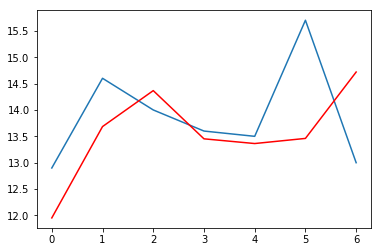

In [28]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()